# [캐글 영화추천 시스템](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system)   

데이터 수집의 급속한 성장은 새로운 정보 시대로 이어졌다. 데이터는 보다 효율적인 시스템을 만드는데 사용되고 있으며 이는 추천 시스템에서 역시 작동하고 있다. 추천 시스템은 **정보 필터링** 시스템의 한 유형으로 검색 결과의 품질을 개선하고 검색 항목과 더 관련 있거나 사용자의 검색 기록으로 실현되는 항목을 제공한다.   

그것들은 사용자가 항목에 줄 등급이나 선호도를 예측하는 데 사용된다. 거의 모든 주요 기술 회사는 어떤 형태로든 적용했습니다: 아마존은 그것을 사용하여 고객에게 제품을 제안하고, 유튜브는 자동 재생에서 다음에 재생할 비디오를 결정하며, 페이스북은 그것을 사용하여 좋아하는 페이지와 팔로우할 사람들을 추천합니다. 게다가, 넷플릭스와 스포티파이와 같은 회사들은 그들의 사업과 성공을 위한 추천 엔진의 효과에 크게 의존한다.  

이 커널에서 우리는 TMDB 5000 영화 데이터셋을 사용하여 기본 영화 추천 시스템을 구축할 것입니다. 나 같은 초보자들에게 이 커널은 추천 시스템의 기초가 될 것이며 당신에게 시작할 무언가를 제공할 것이다.  

> 추가 데이터 [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

* 추천 시스템은 기본적으로 세가지 유형이 있다.  
 - 인구 통계학적 필터링(Demographic Filtering)  
     ```
     인구통계학적 필터링은 영화의 인기도 및 장르에 따라 모든 사용자에게 일반화된 추천을 제공한다. 시스템은 비슷한 인구통계학적 특징을 가진 사용자에게 동일한 영화를 추천한다. 각 사용자는 다르기에 이 접근 방식은 너무 간단한 것으로 간주된다. 이 시스템의 기본 아이디어는 더 인기 있고 비평가들의 찬사를 받은 영화가 대게 청중들이 좋아할 확률이 더 높다는 것이다. 
     ```
     ---
 - 콘텐츠 기반 필터링(Content Based Filtering)
     ```
     콘텐츠 기반 필터링은 특정 항목을 기반으로 비슷한 항목을 제안한다. 해당 시스템은 영화의 장르, 감독, 설명 등과 같은 *메타데이터를 사용해 권장 영화를 제시한다. 콘텐츠 기반 추천 시스템의 아이디어는 만약 사용자가 특정 항목을 좋아하면 해당 항목과 비슷한 항목도 좋아할 것이라는 것이다.
     ```
    ----
 - 협업 기반 필터링(Collaborative Filtering)
     ```
     협업 기반 필터링은 비슷한 관심사를 가진 사람들을 일치시키고 이 매칭을 기반으로 추천을 제공한다. 협업 필터는 콘텐츠 기반 필터와 같은 메타데이터를 필요로 하지 않는다. 
     ```

## 데이터 불러오기

In [102]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [103]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [104]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


 * 첫 번째 자료(dataset)는 다음과 같은 변수가 포함되어 있다.
  - movie_id : 영화 고유 식별자
  - cast : 주연 및 조연 배우 이름
  - crew : 감독, 편집자, 작곡가, 작가 등의 이름
 
 * 두 번째 자료는 다음과 같은 변수가 포함되어 있다.
  - budget : 영화 제작 예산
  - genre : 영화 장르 (액션, 코메디, 스릴러 등)
  - homepage : 영화 홈페이지 링크
  - id : 이는 첫 번째 자료와 같이 movie_id이다.
  - keywords : 영화와 관련된 태그 또는 키워드
  - original_language : 영화가 만들어진 언어
  - original_title : 번역 및 각색 전 원제목
  - overview : 영화에 대한 간략한 설명
  - popularity : 영화 인기 수치
  - production_companies : 영화 제작사
  - production_countries : 영화 제작된 나라
  - release_date : 영화 상영일
  - revenue : 전세계 영화 수익
  - runningtime : 영화 상영 시간
  - status : "Released" or "Rumored"
  - tagline : 포스터 문구
  - title : 영화 타이틀
  - vote_average : 영화가 받은 평균 평점
  - vote_count : 받은 투표 수

In [105]:
df1.columns = ['id', 'title', 'cast', 'crew']
df2 = df2.merge(df1)
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 인구통계학적 필터링(Demographic Filtering)
 - 이를 시작하기 앞서
  - 우리는 영화 점수 및 비율을 위한 평가 지표가 필요하다
  - 모든 영화 점수 계산
  - 점수를 정렬하고 사용자에게 최고의 영화를 추천하자
  
우리는 영화의 평균 평점을 점수로 사용할 수 있지만, 평균 시청률이 8.9점으로 3표만 있는 영화는 평균 7.8점이지만 40표로 더 나은 것으로 간주될 수 없기 때문에 이를 사용하는 것은 공정하지 않을 것이다. 그래서 이 커널에서는. IMDB의 가중 평균(wr)을 사용한다.   

$$Weighted \, Rating(WR)=(\frac{v}{v+m}.R) + (\frac{m}{v+m}.C)$$

 * v는 영화 득표 수
 * m은 차트에 등재에 필요한 최소 득표 수
 * R은 영화 평균 평점
 * C는 전체 보고서의 평균 득표
 
 우리는 이미 **v(vote_conut)**와 **R(vote_average)** 를 가지고 있으며 C는 다음과 같이 계산할 수 있다.

In [106]:
C = df2['vote_average'].mean()
C

6.092171559442011

모든 영화의 평균 평점은 10점 척도 기준 6점이다. 다음 단계는 차트에 나열된 필요한 최소 투표값인 m에 대한 적절한 값을 결정하는 것이다.  
우리는 90번째 백분위수를 컷오프로 사용할 것이다. 즉, 영화가 차트에 등장하려면, 목록에 있는 영화의 최소 90%보다 더 많은 표를 얻어야 한다. 

In [107]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

이제, 우리는 차트에서 적합한 영화를 걸러낼 수 있다.

In [108]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 22)

우리는 이 목록에 481편의 영화가 있는 것을 알 수 있다. 이제, 우리는 자격을 갖춘 영화에 대한 지표를 계산해야 한다.   
이를 위해, 우리는 함수 **weight_rating()**을 정의하고 새로운 기능 점수를 정의할 것이며, 그 중 이 함수를 자격을 갖춘 영화의 DataFrame에 적용해 계산할 것이다.

## 평가 함수

In [109]:
def weight_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m)*R) + (m/(m+v)*C)

In [110]:
# 새로운 변수 '점수'를 정의하고 weighted_rating로 값을 계산한다. 
q_movies['score'] = q_movies.apply(weight_rating, axis=1)

마지막으로 점수 변수를 바탕으로 DataFrame을 정렬하고 상위 10개 영화의 제목, 투표 수, 투표 평균 및 가중 평점 또는 점수를 출력해본다.

In [111]:
# 위에서 계산된 점수에 따라 영화 정렬
q_movies = q_movies.sort_values('score', ascending=False)

# 상위 15개 영화 출력
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


우리는 첫 번째(매우 기본적이지만) 추천 시스템을 만들었다. 해당 시스템의 Trending Now 탭에서 우리는 매우 인기 있는 영화를 찾을 수 있으며 인기 열로 데이터를 정렬할 수 있다.

Text(0.5, 1.0, 'Popular Movies')

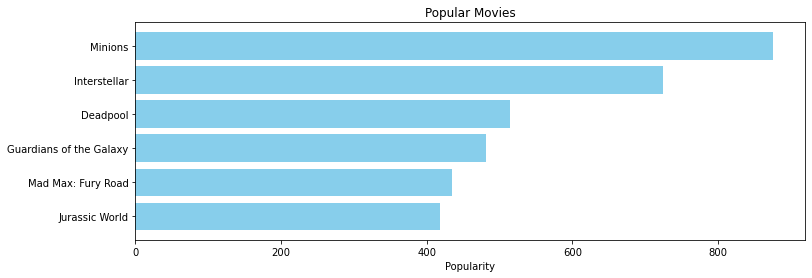

In [112]:
pop = df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6), pop['popularity'].head(6), align='center', color = 'skyblue')
plt.gca().invert_yaxis()  # gca() 현재 Axes()객체를 반환한다. // gca().invert_yaxis()-> y축을 뒤집는다.
plt.xlabel('Popularity')
plt.title('Popular Movies')

> [df.gca().invert_yaxis() 참고](https://m.blog.naver.com/h920203/221684982345)

이제 명심해야 할 것은 이러한 인구통계학적 추천인이 모든 사용자에게 추천 영화의 일반적인 차트를 제공한다는 것이다.  
그들은 특적 사용자의 관심과 취향에 민감하지 않다.  
이것은 우리가 더 세련된 **Content Based Filtering**으로 넘어갈 이유이다. 

# 콘텐츠 기반 필터링(Content Based Filtering)
영화 콘텐츠를(개요, 배우, 제작진, 키워드, 문구 등) 기반으로 하는 해당 추천 시스템은 다른 영화와의 유사성을 찾는데 사용된다.  
그로인해 비슷할 가능성이 가장 높은 영화를 추천한다. 


![nn](https://image.ibb.co/f6mDXU/conten.png![image.png](attachment:image.png))


## 플롯 설명 기반 추천자(Plot description based Recommender)
---
우리는 줄거리 설명을 기반으로 모든 영화의 쌍별(pairwise) 유사성 점수를 계산하고 그 유사성 점수를 기반으로 영화를 추천할 것이다.  
플롯 설명은 데이터 세트의 개요 변수에 나와 있다. 자료를 확인해보자

In [113]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

이전에 약간의 텍스트 처리를 한 적이 있다면 누구라도 개요의 단어 벡터를 변화해야 한다는 것을 알 수 있다.   
이제 각 개요에 대한 TF(Term Frequency-Inverse Document Frequency) 벡터를 계산할 것이다.  

만약 빈도라는 용어가 궁금하다면, 이는 문서에서 단어의 상대적 빈도이며 **(term instance/total instance)**로 주어진다. 역문서 빈도는 용어가 **log*(number of documents/documents with term)**로 주어지는 문서의 상대적인 수이다.   
나타나는 문서에 대한 각 단어의 전반적인 중요성은 **TF*IDF**와 같다.

이렇게 하면 각 열이 개요 어휘(적어도 하나의 문서에 나타나는 모든 단어)의 단어를 나타내고 각 행이 이전과 같이 영화를 나타내는 행렬을 제공한다.  
이것은 줄거리 개요에서 자주 발생하는 단어의 중요성을 줄이기 위해 수행되므로 최종 유사성 점수를 계산하는 데 있어 중요성을 줄이기 위해 수행된다.  

다행히도, scikit-learn은 몇 줄로 TF-IDF 행렬을 생성하는 내장된 TfidfVectorizer 클래스를 제공한다. 

In [114]:
# scikit-learn에서 TfidfVectorizer import
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vecotrizer 객체 정의. 영어의 'the', 'a'와 같은 단어 제거
tfidf = TfidfVectorizer(stop_words='english')

# NaN값은 공백 문자로 치환
df2['overview'] = df2['overview'].fillna('')

# 데이터를 피팅하고 변환해 필요한 TF-IDF 행렬을 구성
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# tfidf_matrix 결과물 형태
tfidf_matrix.shape

(4803, 20978)

우리는 데이터셋에서 4800편의 영화를 묘사하기 위해 20,000개 이상의 다른 단어가 사용되었음을 알 수 있다.  

이 행렬을 통해 유사성 점수를 계산할 수 있으며 유클리드, 피어슨, 코사인 유사성의 방법을 사용할 수 있다.
어떤 점수가 최고인지에 대한 답은 없다. 점수는 시나리오에따라 다르게 작동하므로 종종 다른 지표로 시험하는 것이 좋다. 

우리는 두 영화 사이의 유사성을 나타내는 숫자 양을 계산하기 위해 코사인 유사성을 사용할 것이다. 
우리는 코사인 유사성 점수가 크기와 무관하고 상대적으로 계산하기 쉽고 빠르기 때문에 사용할 것이며 해당 점수는 다음과 같이 정의된다.  

$$similarity = cos(Ø) = \frac{A・B}{||A||||B||} = \frac{\sum_{i=1}^{n}A_iB_i}{\sqrt {\sum_{i=1}^{n}A_i^2} \sqrt{\sum_{i=1}^{n}B_i^2}}$$

우리는 TF-IDF 벡터화를 사용했기 때문에, 점곱을 계산하면 코사인 유사성 점수를 직접 줄 것이다. 
따라서, 우리는 cosine_similarities()대신 sklearn의 linear_kernel()을 사용할 것이다.

In [115]:
from sklearn.metrics.pairwise import linear_kernel

# 코사인 유사도 평가
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

우리는 영화 제목을 입력으로 받고 가장 유사한 10편의 영화 목록을 출력하는 함수를 정의할 것이다.  
첫째, 이를 위해 우리는 영화 제목과 DataFrame 지수의 역매핑이 필요하다.
즉, 제목이 주어진 메타데이터 DataFrame에서 동영상의 색인을 식별하는 메커니즘이 필요하다.

In [116]:
# 인덱스와 영화 제목 역구성 
indices = pd.Series(df2.index, index = df2['title']).drop_duplicates()

이제 추천 기능을 정의할 수 있는 좋은 위치에 있으며 아래는 우리가 따른 다음 단계이다.  

* 제목이 주어진 영화의 색인 가져오기
* 모든 영화와 함께 특정 영화의 코사인 유사도 점수 목록을 가져온다. (첫 번째가 요소 위치이고 두 번째는 유사성 점수인 튜플 목록으로 변환한다.)
* 유사성 점수를 기반으로 앞서 언급한 튜플 목록을 정렬하시오. (즉, 두 번째 요소이다.)
* 이 목록의 상위 10개 요소를 얻어야 한다. 자신을 언급하기 때문에 첫 번째 요소를 무시한다. (특정 영화와 가장 유사한 영화는 해당 영화 자신이다.)
* 상단 요소의 인덱스는 해당하는 제목을 반환한다. 

In [117]:
# 영화 제목을 입력으로 받아들이고 가장 유사한 영화를 출력하는 함수
def get_recommendations(title, cosine_sim = cosine_sim):
    # 제목과 일치하는 영화 색인
    idx = indices[title]
    
    # 해당 영화와 함께 모든 영화의 pairwise 유사성 점수를 출력
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 유사성 점수를 기반으로한 영화 정렬
    sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse = True)
    
    # 유사도 점수 높은 상위 10개 영화 출력
    sim_scores = sim_scores[1:11]
    
    # 영화 인덱스
    movie_indices = [i[0] for i in sim_scores]
    
    # 유사도 상위 10개 영화 출력
    return df2['title'].iloc[movie_indices]

In [118]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [119]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

우리 시스템은 비슷한 줄거리를 가진 영화를 찾는데는 괜찮았으나 추천의 품질은 썩 좋지 못하다.  
"The Dark Knight Rises"는 모든 베트맨 영화를 반환하는 반면, 그 영화를 좋아했던 사람들은 크리스토퍼 놀란의 다른 영화를 즐길 가능성이 더 높다. 
이것은 현재 시스템에 의해 포착될 수 없는 것이다. 

## 크레딧, 장르 및 키워드 기반 추천
---
더 나은 메타데이터의 사용으로 추천의 품질이 증가할 것은 더 말할 것도 없으며 그것이 바로 이번 섹션에서 할 일이다. 
우리는 배우, 감독, 장르 및 영화 줄거리 등과 같은 메타데이터를 기반으로 추천 시스템을 구축할 것이다. 

출연진, 제작진 및 키워드 변수에서 우리는 가장 중요한 세 명의 배우, 감독과 그 영화와 관련된 키워드를 추출해야 한다. 
현재, 우리의 데이터는 '문자화된' 목록의 형태로 존재하며, 우리는 그것을 안전하고 사용 가능한 구조로 변환해야 한다. 

In [121]:
# 문자열화된 변수를 해당 파이썬 객체로 구문 분석한다. 
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

다음으로, 우리는 각 변수에서 필요한 정보를 추출하는데 도움이 될 함수를 작성할 것이다.

In [122]:
# 제작자 변수에서 감독의 이름을 추출하고 이름이 없다면 NaN을 반환한다.
def get_director(X):
    for i in X:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [123]:
# 상위 3개 교소 또는 전체 목록 중 더 많은 것을 반환한다. 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # 세 개 이상의 요소가 있는지 확인한다. 만약 3개 이상이면 첫 세 개만 반환하고 그렇지 않을 전체 목록을 반환한다. 
        if len(names) > 3:
            names = names[:3]
        return names
    
    # 유실/유형 데이터의 경우 빈 목록을 반환한다. 
    return []

In [124]:
# 적절한 형태의 감독, 출연진, 장르 및 키워드 변수를 새롭게 정의
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [125]:
# 처음 3편의 영화를 새로운 변수로 출력
df2[['title', 'cast', 'director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


다음 단계는 이름과 키워드 인스턴스를 소문자로 변환하고 그들 사이의 모든 공백을 벗기는 것이다. 
이것은 우리의 벡터화가 '조니 뎁'과 '조니 갈레키'의 조니를 동일하게 계산하지 않도록 한다. 

In [127]:
# 모든 문자열의 대소문자와 공백의 스트립 이름으로 변환하는 함수
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # 감독 존재 여부 확인하고 없을 경우 공백 문자 출력
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [128]:
# 변수들에 clean_data 함수 적용
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

우리는 이제 벡터화(배우, 감독 및 키워드)에 공급하려는 모든 메타데이터를 포함하는 문자열인 "메타데이터 수프"를 만들 수 있는 위치에 있다.

In [130]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' '+ ' '.join(x['cast'])+ ' ' +x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

다음 단계는 플롯 설명 기반 추천으로 했던 것과 동일하다. 한 가지 중요한 차이점은 TF-IDF 대신 **CountVectorizer()**를 사용한다는 것이다. 이것은 우리가 상대적으로 더 많은 영화에서 연기하거나 감독한 경우 배우/감독의 가중치를 낮추고 싶지 않기 때문이며 이는 그다지 직관적이지 않다. 

In [132]:
# CountVectorizer를 import하고 count matrix 생성
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df2['soup'])

In [134]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [135]:
# 기본 DataFrame의 인덱스를 재설정하고 이전과 같이 역매핑을 구성.
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

이제 새로운 cosine_sim2 행렬을 두 번째 인수로 전달해 get_recommendations()함수를 재사용할 수 있다.

In [138]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [139]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [141]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

추천 시스템이 더 많은 메타데이터로 인해 더 많은 정보를 포착하는데 성공했고 이는 더 나은 추천을 제공했다는 것을 알 수 있다. 
마블이나 DC코믹스 팬들은 같은 제작사의 영화를 좋아할 가능성이 더 높다. 따라서, 위 함수에 production_company를 추가할 수 있다. 
우리는 또한 soup에 함수를 여러 번 추가해 감독에 가중치를 줄 수 있다. 

# 협업 필터링(Collaborative Filtering)
---
> [협업 필터링 블로그 참조](https://hmkim312.github.io/posts/서프라이즈(Surprise)를_사용한_추천시스템(Recommendations)/)

위 콘텐츠 기반 엔진은 몇 가지 심각한 한계가 있으며 그것은 특정 영화에 가까운 영화만 제안이 가능하다는 점이다. 
즉, 취향을 포착하고 장르 전반에 걸쳐 권장 사항을 제공할 수 없다. 

또한, 우리가 만든 엔진은 사용자의 개인적인 취향과 편견을 포착하지 못한다는 점에서 개인화되지 못했다고 볼 수 있다.
영화를 기반으로 한 추천을 우리 엔진에 문의하는 사람은 누구든 그 영화에 대해 동일한 추천을 받을 것이다. 

따라서, 이 섹션에서는 협업 필터링이라는 기술을 사용해 영화 시청자에게 추전할 것이며 이는 두 가지 유형이 있다.



* 유저 기반 필터링(User based filtering)
 ```
 이 시스템은 비슷한 사용자가 좋아했던 제품을 사용자에게 추천한다. 두 사용자 간의 유사성을 측정하기 위해 우리는 피어슨 상관관계 또는 코사인 유사성을 사용할 수 있다. 이 필터링 기술은 예시와 함께 설명할 수 있다.
  다음 행렬에서 각 행은 사용자를 나타내는 반면, 열은 해당 사용자와 대상 사용자 간의 유사성을 기록하는 마지막 영화를 제외한 다른 영화에 해당한다. 
  각 셀은 사용자가 그 영화 주는 등급을 나타내며, 사용자 E를 목표로 가정한다. 
 ```
 ![nn](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)
 
 ```
 사용자 A와 F는 사용자 E와 공통된 영화 등급을 공유하지 않기 때문에, 사용자 E와 유사점은 피어슨 상관 관계에 정의되어 있지 않다. 
 따라서, 우리는 사용자 B, C, D만 고려하면 된다. 
 피어슨 상관 관계를 바탕으로, 우리는 다음과 같은 유사성을 계산할 수 있다.
 ```
 ![nn](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)
 
 ```
 위 표에서 피어슨 상관관계가 음수이기 때문에 사용자 D가 사용자 E와 매우 다르다는 것을 알 수 있다. 
 사용자 D는 "Me Before You"를 자신의 평균 평점보다 높게 평가했고, 사용자 E는 그와 반대이다. 
 이제, 우리는 사용자 E가 다른 사용자를 기반으로 평가하지 않은 영화의 빈칸을 채울 수 있다.
 ```
 ![nn](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

 사용자 기반 CF를 계산하는 것은 간단하지만 몇 가지 문제가 있다.   
 이 중 주요한 문제는 사용자의 선호도가 시간이 지남에 따라 바뀔 수 있다는 것이다.   
 그것은 사용자를 기반으로 매트릭스를 미리 계산하면 성능이 좋지 않을 수 있음을 나타낸다.  
 이를 해결하기 위해, 우리는 아이템 기반 CF를 적용할 수 있다.
 
 * 아이템 기반 협업 필터링(Item Based Collaborative Filtering)
 ```
 사용자 간의 유사성을 측정하는 대신, 항목 기반 CF는 대상 사용자가 평가한 항목과의 유사성을 기반으로 항목을 권장한다. 
 마찬가지로, 유사성은 피어슨 상관 관계 또는 코사인 유사성으로 계산할 수 있다. 
 사용자 간 유사성 측정과의 차이점은 항목 기반 협업 필터링을 통해 사용자 CF가 하는 수평적 방식과 반대로 빈 칸을 수직으로 채운다는 것이다.
 다음 표는 영화 "Me Before You"를 통해 빈 칸을 수직으로 채우는 방법을 보여준다.
 ```
 ![nn](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)
 
 ```
 아이템 기반 CF가 더 정적이기 때문에 동적 사용자 선호도에 의해 제기되는 문제를 성공적으로 방지한다.
 그러나 이 방법에는 몇 가지 문제가 남아 있다. 
 첫째, 주요 쟁점은 확장성입니다. 계산은 고객과 제품 모두에 따라 성장합니다.
 최악의 경우 복잡도는 O(mn)이며, 사용자 수가 m이고 항목이 n개입니다. 
 게다가, 희소성은 또 다른 걱정거리이다. 
 위의 표를 다시 보면, 매트릭스와 타이타닉의 등급을 모두 매긴 사용자는 단 한 명뿐이지만, 둘 사이의 유사성은 1입니다. 극단적인 경우, 우리는 수백만 명의 사용자를 가질 수 있고, 상당히 다른 두 영화 사이의 유사성은 단지 그들이 두 영화 모두를 순위에 올린 유일한 사용자에게 비슷한 순위를 가지고 있기 때문에 매우 높을 수 있다.
 ```

## 단일 값 분해(Single Value Decomposition)
---
CF에 의해 생성된 확작성 및 희소성 문제를 처맇라는 한 가지 방법은 **잠재 요인 모델**을 활용해 사용자와 항목 간 유사성을 포착하는 것이다.   
본질적으로, 우리는 추천 문제를 최적화 문제로 바꾸길 원하며 사용자가 주어진 항목의 등급을 얼마나 잘 예측하는 지 알 수 있다.  
일반적인 메트릭 중 하나는 RMSE(Root Mean Square Error)이며 이는 **RMSE가 낮을수록 성능이 우수**하다. 

잠재적 요인이란사용자나 아이템이 가지고 있는 속성이나 개념을 설명하는 광범위한 아이디어로 예를 들어 음악의 경우 잠재적 요소는 음악이 속한 장르를 들 수 있다.  
이제 사용할 SVD는 잠재적 요인을 추출해 효용 매트릭스의 크기를 감소시킨다.  
본질적으로, 우리는 각 사용자와 항목을 r차원의 잠재 공간에 매핑한다. 따라서 사용자와 항목이 직접 비교될 때 사용자 간의 관계를 더 잘 이해할 수 있다. 

![nn](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

이제 구현하는 방법을 살펴보자. 이전에 사용한 데이터셋에서는 userid(협동 필터링에 필요)가 없었기 때문에 다른 데이터 셋을 로드한다.
아래 부터는 SVD를 구현하기 위해 서프라이즈 라이브러리를 사용할 것이다.

In [147]:
from surprise import Reader, Dataset, SVD#, evaluate -> 2020년 1월 부로 변경됨.
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


해당 데이터는 이전 영화 데이터와 달리 5점 척도로 평가된다는 것을 유의하자.


In [150]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

svd = SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9046  0.8924  0.8950  0.9011  0.8868  0.8960  0.0063  
MAE (testset)     0.6953  0.6881  0.6908  0.6916  0.6824  0.6896  0.0043  
Fit time          6.25    6.22    6.24    6.22    6.30    6.24    0.03    
Test time         0.14    0.14    0.14    0.34    0.14    0.18    0.08    


{'test_rmse': array([0.90458342, 0.89243812, 0.89501762, 0.90111454, 0.8868269 ]),
 'test_mae': array([0.69529001, 0.68813132, 0.69081592, 0.69159705, 0.6824004 ]),
 'fit_time': (6.24911093711853,
  6.215618848800659,
  6.238683223724365,
  6.216423988342285,
  6.298541069030762),
 'test_time': (0.13922691345214844,
  0.1398639678955078,
  0.13851428031921387,
  0.3390340805053711,
  0.14035701751708984)}

위의 결과로 약 0.89의 RMSE를 얻었는데, 이는 우리의 경우에 충분하다고 할 수 있다.  
이제 데이터를 훈련하고 예측하도록 한다.

In [159]:
trainset = data.build_full_trainset()
svd.fit(trainset)

userId 1을 확인해 그/그녀가 준 등급을 확인해보자

In [161]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [163]:
svd.predict(1, 302, 3)  #predict(유저아이디, 아이템(영화) 아이디, 실제 평점, est=예측 평점)

Prediction(uid=1, iid=302, r_ui=3, est=2.707798443923794, details={'was_impossible': False})

영화 아이디가 302인 경우, 예측 평점은 2.7078이 된다. 이 추천 시스템의 한 가지 놀라운 특징은 영화가 무엇인지(또는 영화가 무엇을 담고 있는지) 신경 쓰지 않는다는 것이다.  
순전히 할당된 영화 ID를 기반으로 작동하며 다른 사용자가 영화를 예측한 방식을 기반으로 예측하려 한다. 

# 결론
---
우리는 인구 통계학, 컨텐츠 기반 및 협업 필터링을 사용해 추천 시스템을 만들었다.  
인구 통계 필터링은 매우 기초적으로 실질적으로 사용될 수 없지만, **하이브리드 시스템**은 두 가지 접근 방식이 거의 보완적인 것으로 입증되었기 때문에 콘텐츠 기반 및 협업 필터링에 활용할 수 있다.   
지금까지 마친 모델은 매우 기초적으로 기본적인 프레임 워크만 제공한다.


## 참고 자료
1. https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75
2. https://www.kaggle.com/rounakbanik/movie-recommender-systems